In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../results/outputs/target_created.csv')

In [4]:
feature_cols = df.drop(columns=['AQI_Category']).select_dtypes(include='number').columns
print("Feature columns for scaling:", feature_cols)

Feature columns for scaling: Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')


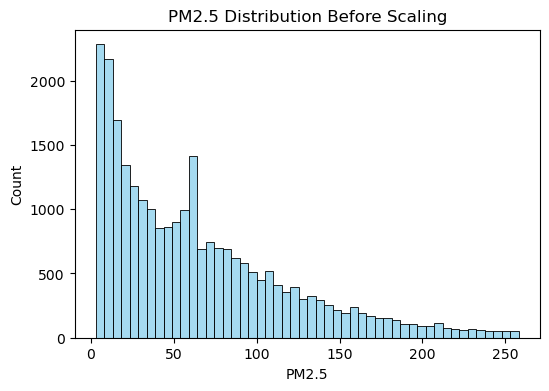

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df['PM2.5'], bins=50, color='skyblue')
plt.title("PM2.5 Distribution Before Scaling")
plt.xlabel("PM2.5")
plt.ylabel("Count")
os.makedirs('../results/eda_visualizations', exist_ok=True)
plt.savefig('../results/eda_visualizations/pm25_before_scaling.png')
plt.show()

In [6]:
#Apply StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])

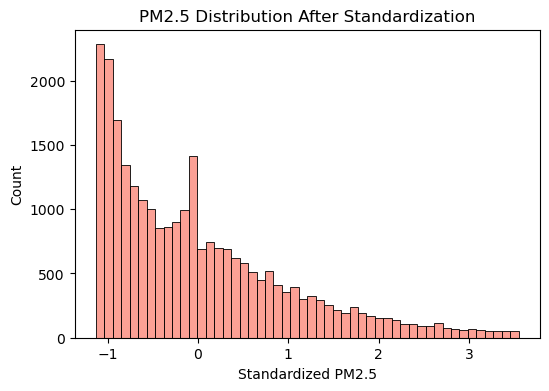

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df_scaled['PM2.5'], bins=50, color='salmon')
plt.title("PM2.5 Distribution After Standardization")
plt.xlabel("Standardized PM2.5")
plt.ylabel("Count")
plt.savefig('../results/eda_visualizations/pm25_after_scaling.png')
plt.show()

In [8]:
os.makedirs('../results/outputs', exist_ok=True)
df_scaled.to_csv('../results/outputs/scaled_data.csv', index=False)